In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv("../data/Simple LR/Salary_dataset.csv")
X = ds["YearsExperience"].values
Y = ds["Salary"].values

In [3]:
X

array([ 1.2,  1.4,  1.6,  2.1,  2.3,  3. ,  3.1,  3.3,  3.3,  3.8,  4. ,
        4.1,  4.1,  4.2,  4.6,  5. ,  5.2,  5.4,  6. ,  6.1,  6.9,  7.2,
        8. ,  8.3,  8.8,  9.1,  9.6,  9.7, 10.4, 10.6])

In [4]:
Y

array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432., 105583., 116970., 112636.,
       122392., 121873.])

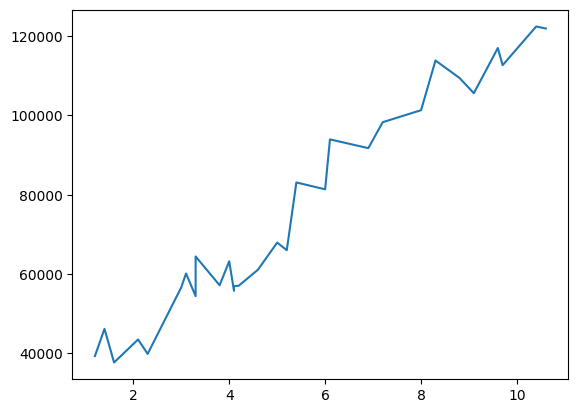

In [5]:
plt.plot(X,Y)

In [6]:
X = np.array(X)
Y = np.array(Y)

In [7]:
def mean(X):
    return np.sum(X)/len(X)

In [9]:
def variance(X):
    mean_value = mean(X)
    return np.sum((X-mean_value)**2)/len(X)

In [10]:
def norm(X):
    mean_value = mean(X)
    variance_value = variance(X)
    return (X - mean_value)/np.sqrt(variance_value)

In [11]:
X_norm = norm(X)

In [12]:
X_norm

array([-1.51005294, -1.43837321, -1.36669348, -1.18749416, -1.11581443,
       -0.86493538, -0.82909552, -0.75741579, -0.75741579, -0.57821647,
       -0.50653674, -0.47069688, -0.47069688, -0.43485702, -0.29149756,
       -0.1481381 , -0.07645838, -0.00477865,  0.21026054,  0.2461004 ,
        0.53281931,  0.6403389 ,  0.92705781,  1.03457741,  1.21377673,
        1.32129632,  1.50049564,  1.5363355 ,  1.78721455,  1.85889428])

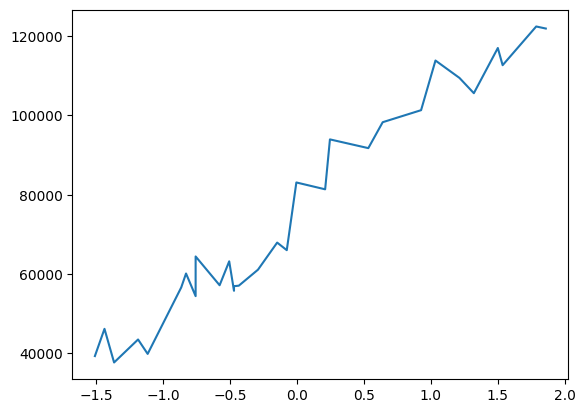

In [13]:
plt.plot(X_norm,Y)

In [53]:
import random

In [66]:
class SimpleLR:
    def __init__(self, lr=0.1, max_iter=2000, threshold=1e-6):
        self.lr = lr
        self.max_iter = max_iter
        self.threshold = threshold
        self.weight = random.uniform(-1,1)
        self.bias = random.uniform(-1,1)
    def predict(self, X):
        return self.weight*X + self.bias
    def fit(self, X, Y):
        n = len(X)
        loss_history = []
        y_pred = self.predict(X)
        errors = Y-y_pred
        prev_loss = (1/(2*n)) * np.sum(errors**2)
        loss_history.append(prev_loss)
        for i in range(self.max_iter):
            w_grad = (1/n) * np.sum(errors*X)
            b_grad = (1/n) * np.sum(errors)
            self.weight += self.lr * w_grad
            self.bias += self.lr * b_grad
            y_pred = self.predict(X)
            errors = Y-y_pred
            curr_loss = (1/(2*n)) * np.sum(errors**2)
            if np.abs(curr_loss - prev_loss) < self.threshold:
                break
            prev_loss = curr_loss
            loss_history.append(curr_loss)
        return loss_history
    def plot(self, X, Y):
        y_pred = self.predict(X)
        plt.plot(X,Y)
        plt.plot(X,y_pred)

In [67]:
model = SimpleLR()

In [68]:
loss_history = model.fit(X_norm, Y)

In [69]:
loss_history

[3251466102.896048,
 2636658283.759415,
 2138663950.2587433,
 1735288540.1231987,
 1408554457.9134076,
 1143899851.3234768,
 929529619.9856329,
 755889732.6019791,
 615241423.8212199,
 501316293.7088048,
 409036938.3177485,
 334290660.45099294,
 273746175.378921,
 224705142.47054264,
 184981905.81475627,
 152806084.12356922,
 126743668.55370767,
 105633111.94211993,
 88533561.08673382,
 74682924.89387105,
 63463909.57765225,
 54376507.17151498,
 47015711.22254377,
 41053466.50387713,
 36224048.28175712,
 32312219.521839973,
 29143638.22630705,
 26577087.376925394,
 24498181.18892628,
 22814267.17664701,
 21450296.82670073,
 20345480.84324427,
 19450579.896644548,
 18725710.129898768,
 18138565.618834693,
 17662978.5648728,
 17277753.05116365,
 16965720.385059256,
 16712973.925514702,
 16508249.293283604,
 16342422.341176413,
 16208102.509969592,
 16099303.44669205,
 16011176.205437254,
 15939793.140020875,
 15881972.857033597,
 15835138.427813891,
 15797202.540145947,
 15766474.4711349

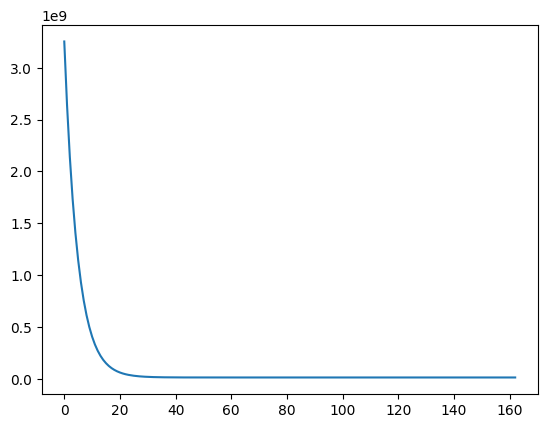

In [70]:
plt.plot(loss_history)

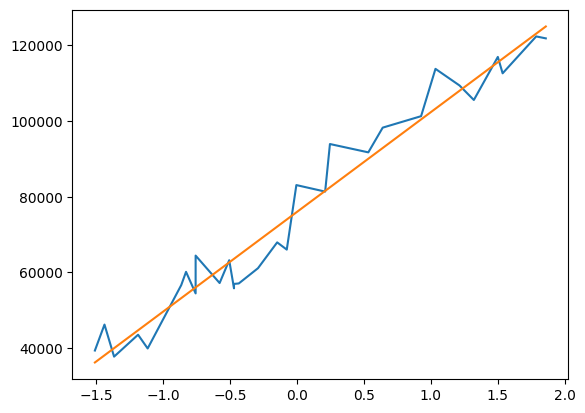

In [71]:
model.plot(X_norm,Y)